# Part 1: Working towards the core

In this process notebook I will be briefly providing an overview of our core problem.

The core or driving question for Peerwise-Group (Denyer) is:

**What are the impacts of the group membership for performance using PeerWise.**



In [1]:
#importing wanted libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading in the files
path_questions = "/content/drive/My Drive/Colab Notebooks/ASSIGNMENT 2/data/C4Questions.xlsx"
path_tags= "/content/drive/My Drive/Colab Notebooks/ASSIGNMENT 2/data/C4Tags.xlsx"
path_users ="/content/drive/My Drive/Colab Notebooks/ASSIGNMENT 2/data/C4UsersCourses.xlsx"
tags = pd.read_excel(path_tags)
questions =pd.read_excel(path_questions)
users= pd.read_excel(path_users)

#changing the data types (see mini 8 for rationale)
tags.CourseID= tags.CourseID.astype(str)
tags.QuestionID= tags.QuestionID.astype(str)
tags.TagID= tags.TagID.astype(str)
#transformed data set:
tags.dtypes

CourseID      object
QuestionID    object
Tag           object
TagID         object
dtype: object

Since I have imported a new file  let us have a quick look at the UsersCourses file which details the different groups each of the students were assigned to, as well as the different data types of the variables and adjust accordingly.

In [3]:
#glimpsing the data
users.head()
#data types
users.dtypes

user          int64
course_id     int64
Team         object
dtype: object

The 'user' and 'course_id' have been recorded as `int64` types and will need to be changed to `str` object types:


In [4]:
users.user= users.user.astype(str)
users.course_id= users.course_id.astype(str)
users.dtypes

user         object
course_id    object
Team         object
dtype: object

Here we will look at how many people have been assigned to each group.

In [5]:
counts_groups =users['Team'].value_counts()
counts_groups

Green     39
Red       37
Pink      37
Brown     37
Blue      35
Black     35
Yellow    31
White     23
Purple    15
Name: Team, dtype: int64

There are 9 groups where students have not evenly been divided into .

## Joining the `UsersCourses` file with the `Questions`  files.

I tried joining the 3 datasets together but the result was more like a cross join.

By joining these 2 data sets we can perhaps infer whether being in a particular group can impact a student's performance.

In [6]:
#tags['course_id']= tags['CourseID']

In [ ]:
questions.head(n=3)
# have to cast the following variables 
questions.id= questions.id.astype(str)
questions.course_id= questions.course_id.astype(str)
questions.user= questions.user.astype(str)
questions.dtypes

I think it would be interesting to see whether groups had an effect on the number of total comments and or total responses as this may also be indicators of student performance (not just academic marks).

I believe other members of my group conducted some analysis on the average rating and the academic mark.

In [8]:
#selecting wanted variables for analysis
#joining tags and questions together
users_qs= questions[['course_id','id','user', 'avg_rating', 'total_responses', 'total_comments']].merge(users, how="inner", on="user")

users_qs


,course_id_x,id,user,avg_rating,total_responses,total_comments,course_id_y,Team
0,21320,4464532,635990,3.78,10,8,21320,Brown
1,21320,4483763,635990,3.75,4,2,21320,Brown
2,21320,4464967,636029,3.25,7,5,21320,Pink
3,21320,4480828,636029,0.00,0,0,21320,Pink
4,21320,4480830,636029,3.40,9,3,21320,Pink
...,...,...,...,...,...,...,...,...
531,21328,4486443,637271,4.00,2,2,21328,Brown
532,21328,4489197,637271,4.00,1,0,21328,Brown
533,21328,4488632,637268,3.00,3,2,21328,White
534,21328,4488790,591275,4.00,1,1,21328,White


In [9]:
# grouping total comments and responses by assigned groups
resp_comments = users_qs[['id','user','total_responses', 'total_comments', 'Team']]
resp_comments

,id,user,total_responses,total_comments,Team
0,4464532,635990,10,8,Brown
1,4483763,635990,4,2,Brown
2,4464967,636029,7,5,Pink
3,4480828,636029,0,0,Pink
4,4480830,636029,9,3,Pink
...,...,...,...,...,...
531,4486443,637271,2,2,Brown
532,4489197,637271,1,0,Brown
533,4488632,637268,3,2,White
534,4488790,591275,1,1,White


In [10]:
 group_no= resp_comments.groupby('Team', as_index=False)['user'].nunique()
group_no

,Team,user
0,Black,35
1,Blue,33
2,Brown,36
3,Green,37
4,Pink,37
5,Purple,15
6,Red,37
7,White,23
8,Yellow,31


In [ ]:
# average number of total responses by groups
averages = resp_comments.groupby('Team', as_index=False).mean()
resp_comments.groupby('Team', as_index=False).median()
#averages
group_no['total_responses']= averages['total_responses']
group_no['total_comments']= averages['total_comments']
group_no

Upon noticing that the average values are quite similar we could make a more robust claim by looking at the median number of total responses and comments.

In [16]:
median =resp_comments.groupby('Team', as_index=False).median()
group_no['total_responses']= median['total_responses']
group_no['total_comments']= median['total_comments']
group_no


,Team,user,total_responses,total_comments
0,Black,35,5.5,4.5
1,Blue,33,3.0,3.0
2,Brown,36,4.0,3.0
3,Green,37,7.0,4.0
4,Pink,37,5.0,3.0
5,Purple,15,3.0,2.0
6,Red,37,7.0,6.0
7,White,23,3.0,2.0
8,Yellow,31,4.0,3.0


## Visualisations:

Here we will visualise:
- distribution of students in each group
- the total_responses 
- the total_comments

Text(0.5, 1.0, 'Distribution of Users within each group')

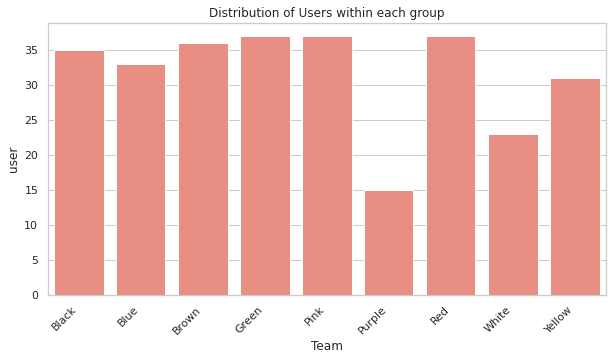

In [22]:
# Distribution of students in each group
import seaborn as sns
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
chart = sns.barplot(x="Team", y= "user", data=group_no, color = "salmon")
chart.set_xticklabels(chart.get_xticklabels(), rotation =45, horizontalalignment='right')
plt.title("Distribution of Users within each group")

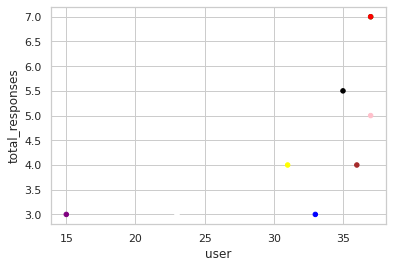

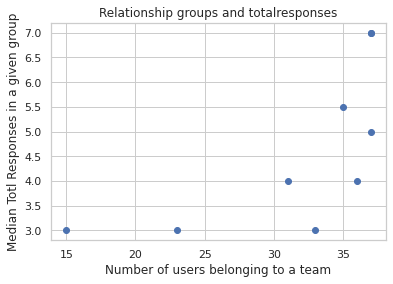

In [30]:
# group vs total_responses as colored by their respective teams 
# white is difficult to see
group_no.plot.scatter(x='user', y = "total_responses", c= "Team")

import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(group_no['user'], group_no['total_responses'])
plt.title('Relationship groups and totalresponses')
plt.xlabel('Number of users belonging to a team')
plt.ylabel('Median Totl Responses in a given group')

plt.show()

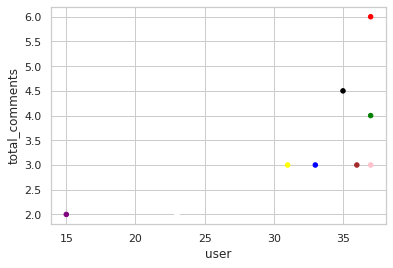

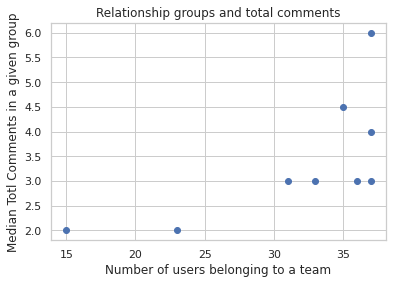

In [31]:
# group vs total_comments as colored by their respective teams 
# white is difficult to see
group_no.plot.scatter(x='user', y = "total_comments", c= "Team")

import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(group_no['user'], group_no['total_comments'])
plt.title('Relationship groups and total comments')
plt.xlabel('Number of users belonging to a team')
plt.ylabel('Median Totl Comments in a given group')

plt.show()